# IMPORT LIBRARIES

In [6]:
import pandas as pd
from gensim import corpora
from gensim.models import LdaModel
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk
from Singkatan.SingkatanConverter import SingkatanConverter
import string
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
from transformers import BertTokenizer, AutoModelForSequenceClassification, TrainingArguments, Trainer

# LOAD DATASET

In [8]:
# Load the df
file_path = 'dataset.csv'
df = pd.read_csv(file_path)


In [9]:
# Display the first few rows of the df
df.head()

,ga:sourceMedium,ga:pageTitle,ga:users,ga:bounceRate,ga:pageviews,ga:pageviewsPerSession,ga:avgTimeOnPage
0,facebook / cpc,"Bikin Lambe Turah Diomelin, Nih Si Seksi yang ...",13736.0,19.269967,83593.0,6.042140,21.790189
1,facebook / cpc,Heboh! Kiki Farel Transfer Uang Jajan Rp 1 Jut...,15909.0,62.303763,74032.0,4.612011,16.330553
2,facebook / cpc,"Tak Sesuai Harapan, Barang Belanja Online Ini ...",7748.0,30.934520,54657.0,6.949396,21.429338
3,facebook / cpc,"Antar 'Tuyul', 7 Pengemudi Grab Dibekuk",43893.0,6.966219,47924.0,1.106560,5.056397
4,facebook / cpc,Melihat Kantor Pelayanan Grab Driver Center,41155.0,11.630219,44072.0,43.809145,180.944233


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ga:sourceMedium         156 non-null    object 
 1   ga:pageTitle            156 non-null    object 
 2   ga:users                155 non-null    float64
 3   ga:bounceRate           155 non-null    float64
 4   ga:pageviews            155 non-null    float64
 5   ga:pageviewsPerSession  155 non-null    float64
 6   ga:avgTimeOnPage        155 non-null    float64
dtypes: float64(5), object(2)
memory usage: 8.7+ KB


# EXPLORATORY DATA ANALYSIS

## Replace Column Name

In [11]:
df.columns = df.columns.str.replace('ga:', '')
df

,sourceMedium,pageTitle,users,bounceRate,pageviews,pageviewsPerSession,avgTimeOnPage
0,facebook / cpc,"Bikin Lambe Turah Diomelin, Nih Si Seksi yang ...",13736.0,19.269967,83593.0,6.042140,21.790189
1,facebook / cpc,Heboh! Kiki Farel Transfer Uang Jajan Rp 1 Jut...,15909.0,62.303763,74032.0,4.612011,16.330553
2,facebook / cpc,"Tak Sesuai Harapan, Barang Belanja Online Ini ...",7748.0,30.934520,54657.0,6.949396,21.429338
3,facebook / cpc,"Antar 'Tuyul', 7 Pengemudi Grab Dibekuk",43893.0,6.966219,47924.0,1.106560,5.056397
4,facebook / cpc,Melihat Kantor Pelayanan Grab Driver Center,41155.0,11.630219,44072.0,43.809145,180.944233
...,...,...,...,...,...,...,...
151,facebook / cpc,"Edan, Ponsel Ini Punya Baterai 13.000 mAh",198.0,76.923077,215.0,1.837607,101.685393
152,facebook / cpc,Gempa Keras di Jakarta Terasa Lebih dari 1 Menit,180.0,20.000000,215.0,2.388889,233.640000
153,facebook / cpc,Jennifer Dunn dan Deretan Mobil Mewahnya,180.0,100.000000,215.0,23.888889,97.836735
154,facebook / cpc,Kasus Salah Baca Xiaomi Terulang Kembali,180.0,83.333333,215.0,1.990741,178.449438


In [12]:
df

,sourceMedium,pageTitle,users,bounceRate,pageviews,pageviewsPerSession,avgTimeOnPage
0,facebook / cpc,"Bikin Lambe Turah Diomelin, Nih Si Seksi yang ...",13736.0,19.269967,83593.0,6.042140,21.790189
1,facebook / cpc,Heboh! Kiki Farel Transfer Uang Jajan Rp 1 Jut...,15909.0,62.303763,74032.0,4.612011,16.330553
2,facebook / cpc,"Tak Sesuai Harapan, Barang Belanja Online Ini ...",7748.0,30.934520,54657.0,6.949396,21.429338
3,facebook / cpc,"Antar 'Tuyul', 7 Pengemudi Grab Dibekuk",43893.0,6.966219,47924.0,1.106560,5.056397
4,facebook / cpc,Melihat Kantor Pelayanan Grab Driver Center,41155.0,11.630219,44072.0,43.809145,180.944233
...,...,...,...,...,...,...,...
151,facebook / cpc,"Edan, Ponsel Ini Punya Baterai 13.000 mAh",198.0,76.923077,215.0,1.837607,101.685393
152,facebook / cpc,Gempa Keras di Jakarta Terasa Lebih dari 1 Menit,180.0,20.000000,215.0,2.388889,233.640000
153,facebook / cpc,Jennifer Dunn dan Deretan Mobil Mewahnya,180.0,100.000000,215.0,23.888889,97.836735
154,facebook / cpc,Kasus Salah Baca Xiaomi Terulang Kembali,180.0,83.333333,215.0,1.990741,178.449438


## Check Duplicates and Unique Value

In [13]:
df['sourceMedium'].unique()
df[df.duplicated(subset=['pageTitle'])]

,sourceMedium,pageTitle,users,bounceRate,pageviews,pageviewsPerSession,avgTimeOnPage
103,google / cpc,Gempa Keras Guncang Jakarta,206.0,27.777778,323.0,1.993827,85.038627
114,google / cpc,"Kabar Duka, Sys NS Meninggal Dunia",81.0,42.857143,296.0,4.698413,10.051793
133,google / cpc,Andi Narogong Ungkap Peran Novanto cs di Proye...,117.0,0.000000,251.0,0.000000,84.765957
134,google / cpc,"Gempa 6,4 SR Guncang Jakarta",189.0,100.000000,251.0,27.888889,143.200000
142,google / cpc,"Messi Berjaket Go-Jek, Isyana Kini Jadi 'Korba...",9.0,0.000000,233.0,0.000000,24.607143


In [14]:
df[df['pageTitle'] == 'Gempa Keras Guncang Jakarta']
## duplicate cause 2 sources

df[df['pageTitle'] == 'Kabar Duka, Sys NS Meninggal Dunia']
df[df['pageTitle'] == 'Gempa 6,4 SR Guncang Jakarta']


,sourceMedium,pageTitle,users,bounceRate,pageviews,pageviewsPerSession,avgTimeOnPage
14,facebook / cpc,"Gempa 6,4 SR Guncang Jakarta",3717.0,50.0,4220.0,78.148148,256.062098
134,google / cpc,"Gempa 6,4 SR Guncang Jakarta",189.0,100.0,251.0,27.888889,143.200000


## Check Nulls

In [15]:
df[df.isnull().any(axis=1)]

,sourceMedium,pageTitle,users,bounceRate,pageviews,pageviewsPerSession,avgTimeOnPage
155,facebook / cpc,Netizen Ramai Teriakkan,NaN,NaN,NaN,NaN,NaN


In [16]:
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 155 entries, 0 to 154
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   sourceMedium         155 non-null    object 
 1   pageTitle            155 non-null    object 
 2   users                155 non-null    float64
 3   bounceRate           155 non-null    float64
 4   pageviews            155 non-null    float64
 5   pageviewsPerSession  155 non-null    float64
 6   avgTimeOnPage        155 non-null    float64
dtypes: float64(5), object(2)
memory usage: 9.7+ KB


# CLEANING

In [17]:
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\XYLA\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\XYLA\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

## Lower Cased

In [18]:
df['pageTitle'] = df['pageTitle'].str.lower()
df

,sourceMedium,pageTitle,users,bounceRate,pageviews,pageviewsPerSession,avgTimeOnPage
0,facebook / cpc,"bikin lambe turah diomelin, nih si seksi yang ...",13736.0,19.269967,83593.0,6.042140,21.790189
1,facebook / cpc,heboh! kiki farel transfer uang jajan rp 1 jut...,15909.0,62.303763,74032.0,4.612011,16.330553
2,facebook / cpc,"tak sesuai harapan, barang belanja online ini ...",7748.0,30.934520,54657.0,6.949396,21.429338
3,facebook / cpc,"antar 'tuyul', 7 pengemudi grab dibekuk",43893.0,6.966219,47924.0,1.106560,5.056397
4,facebook / cpc,melihat kantor pelayanan grab driver center,41155.0,11.630219,44072.0,43.809145,180.944233
...,...,...,...,...,...,...,...
150,facebook / cpc,ungkapan duka cita untuk sys ns deras di insta...,153.0,0.000000,224.0,0.000000,109.847059
151,facebook / cpc,"edan, ponsel ini punya baterai 13.000 mah",198.0,76.923077,215.0,1.837607,101.685393
152,facebook / cpc,gempa keras di jakarta terasa lebih dari 1 menit,180.0,20.000000,215.0,2.388889,233.640000
153,facebook / cpc,jennifer dunn dan deretan mobil mewahnya,180.0,100.000000,215.0,23.888889,97.836735


## Remove Punctuation

In [19]:
df['pageTitle'] = df['pageTitle'].str.replace(f"[{string.punctuation}]", '', regex=True)
df

,sourceMedium,pageTitle,users,bounceRate,pageviews,pageviewsPerSession,avgTimeOnPage
0,facebook / cpc,bikin lambe turah diomelin nih si seksi yang l...,13736.0,19.269967,83593.0,6.042140,21.790189
1,facebook / cpc,heboh kiki farel transfer uang jajan rp 1 juta...,15909.0,62.303763,74032.0,4.612011,16.330553
2,facebook / cpc,tak sesuai harapan barang belanja online ini b...,7748.0,30.934520,54657.0,6.949396,21.429338
3,facebook / cpc,antar tuyul 7 pengemudi grab dibekuk,43893.0,6.966219,47924.0,1.106560,5.056397
4,facebook / cpc,melihat kantor pelayanan grab driver center,41155.0,11.630219,44072.0,43.809145,180.944233
...,...,...,...,...,...,...,...
150,facebook / cpc,ungkapan duka cita untuk sys ns deras di insta...,153.0,0.000000,224.0,0.000000,109.847059
151,facebook / cpc,edan ponsel ini punya baterai 13000 mah,198.0,76.923077,215.0,1.837607,101.685393
152,facebook / cpc,gempa keras di jakarta terasa lebih dari 1 menit,180.0,20.000000,215.0,2.388889,233.640000
153,facebook / cpc,jennifer dunn dan deretan mobil mewahnya,180.0,100.000000,215.0,23.888889,97.836735


## Remove Stop Words

In [20]:
def load_stopwords(file_path):
    with open(file_path, 'r', encoding='utf-8') as file:
        stopwords = set(line.strip().lower() for line in file)
    return stopwords

stop_words = load_stopwords('stopwords-id.txt')
stop_words

{'ada',
 'adalah',
 'adanya',
 'adapun',
 'agak',
 'agaknya',
 'agar',
 'akan',
 'akankah',
 'akhir',
 'akhiri',
 'akhirnya',
 'aku',
 'akulah',
 'amat',
 'amatlah',
 'anda',
 'andalah',
 'antar',
 'antara',
 'antaranya',
 'apa',
 'apaan',
 'apabila',
 'apakah',
 'apalagi',
 'apatah',
 'artinya',
 'asal',
 'asalkan',
 'atas',
 'atau',
 'ataukah',
 'ataupun',
 'awal',
 'awalnya',
 'bagai',
 'bagaikan',
 'bagaimana',
 'bagaimanakah',
 'bagaimanapun',
 'bagi',
 'bagian',
 'bahkan',
 'bahwa',
 'bahwasanya',
 'baik',
 'bakal',
 'bakalan',
 'balik',
 'banyak',
 'bapak',
 'baru',
 'bawah',
 'beberapa',
 'begini',
 'beginian',
 'beginikah',
 'beginilah',
 'begitu',
 'begitukah',
 'begitulah',
 'begitupun',
 'bekerja',
 'belakang',
 'belakangan',
 'belum',
 'belumlah',
 'benar',
 'benarkah',
 'benarlah',
 'berada',
 'berakhir',
 'berakhirlah',
 'berakhirnya',
 'berapa',
 'berapakah',
 'berapalah',
 'berapapun',
 'berarti',
 'berawal',
 'berbagai',
 'berdatangan',
 'beri',
 'berikan',
 'berikut'

# LDA IMPLEMENTATION

In [21]:
documents = df['pageTitle'].tolist()

# Preprocess documents
texts = [[word for word in word_tokenize(doc.lower()) if word.isalnum() and word not in stop_words] for doc in documents]

# Create a dictionary and corpus for LDA
dictionary = corpora.Dictionary(texts)
corpus = [dictionary.doc2bow(text) for text in texts]

# Train LDA model
lda_model = LdaModel(corpus, num_topics=2, id2word=dictionary, passes=15)

# Display topics
for idx, topic in lda_model.print_topics(-1):
    print(f"Topic: {idx} \nWords: {topic}\n")

Topic: 0 
Words: 0.024*"sys" + 0.024*"ns" + 0.013*"foto" + 0.010*"meninggal" + 0.008*"dunia" + 0.008*"mobil" + 0.008*"rumah" + 0.006*"artis" + 0.006*"pasha" + 0.006*"ungu"

Topic: 1 
Words: 0.023*"gempa" + 0.012*"jakarta" + 0.010*"polisi" + 0.009*"foto" + 0.009*"tuyul" + 0.009*"grab" + 0.008*"driver" + 0.008*"banten" + 0.007*"sr" + 0.007*"guncang"



In [22]:
def get_topic_distribution(model, corpus):
    return [model.get_document_topics(doc, minimum_probability=0) for doc in corpus]

topic_distributions = get_topic_distribution(lda_model, corpus)

# Convert topic distributions to a DataFrame
topic_df = pd.DataFrame([dict(dist) for dist in topic_distributions]).fillna(0)

# Join topic distributions with the original DataFrame
df_topics = df.join(topic_df, rsuffix='_topic')

In [23]:
df_topics

,sourceMedium,pageTitle,users,bounceRate,pageviews,pageviewsPerSession,avgTimeOnPage,0,1
0,facebook / cpc,bikin lambe turah diomelin nih si seksi yang l...,13736.0,19.269967,83593.0,6.042140,21.790189,0.939725,0.060275
1,facebook / cpc,heboh kiki farel transfer uang jajan rp 1 juta...,15909.0,62.303763,74032.0,4.612011,16.330553,0.050556,0.949444
2,facebook / cpc,tak sesuai harapan barang belanja online ini b...,7748.0,30.934520,54657.0,6.949396,21.429338,0.067610,0.932390
3,facebook / cpc,antar tuyul 7 pengemudi grab dibekuk,43893.0,6.966219,47924.0,1.106560,5.056397,0.087708,0.912292
4,facebook / cpc,melihat kantor pelayanan grab driver center,41155.0,11.630219,44072.0,43.809145,180.944233,0.086381,0.913619
...,...,...,...,...,...,...,...,...,...
150,facebook / cpc,ungkapan duka cita untuk sys ns deras di insta...,153.0,0.000000,224.0,0.000000,109.847059,0.936127,0.063873
151,facebook / cpc,edan ponsel ini punya baterai 13000 mah,198.0,76.923077,215.0,1.837607,101.685393,0.087020,0.912980
152,facebook / cpc,gempa keras di jakarta terasa lebih dari 1 menit,180.0,20.000000,215.0,2.388889,233.640000,0.084905,0.915095
153,facebook / cpc,jennifer dunn dan deretan mobil mewahnya,180.0,100.000000,215.0,23.888889,97.836735,0.899835,0.100165


# INDOBERT

In [24]:
from transformers import BertTokenizer, BertForSequenceClassification
import torch
import openai
from bertopic.representation import OpenAI

In [25]:
from bertopic import BERTopic
from sentence_transformers import SentenceTransformer
from umap import UMAP
from hdbscan import HDBSCAN

from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords


In [26]:
pageTitle = df["pageTitle"]

In [27]:
indonesia_stopwords = stopwords.words('indonesian')

embedding_model = SentenceTransformer('firqaaa/indo-sentence-bert-base')
embeddings = embedding_model.encode(pageTitle, show_progress_bar=True)
umap_model = UMAP(n_neighbors=10, n_components=10, min_dist=0.1, metric='cosine', random_state=42)
hdbscan_model = HDBSCAN(min_cluster_size=10, metric='euclidean', cluster_selection_method='eom', prediction_data=True)
vectorizer_model = CountVectorizer(stop_words=indonesia_stopwords, min_df=2, ngram_range=(1, 2))

pytorch_model.bin:  38%|###7      | 189M/498M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/551 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/229k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/709k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Batches:   0%|          | 0/5 [00:00<?, ?it/s]

In [86]:
df

,sourceMedium,pageTitle,users,bounceRate,pageviews,pageviewsPerSession,avgTimeOnPage
0,facebook / cpc,bikin lambe turah diomelin nih si seksi yang l...,13736.0,19.269967,83593.0,6.042140,21.790189
1,facebook / cpc,heboh kiki farel transfer uang jajan rp 1 juta...,15909.0,62.303763,74032.0,4.612011,16.330553
2,facebook / cpc,tak sesuai harapan barang belanja online ini b...,7748.0,30.934520,54657.0,6.949396,21.429338
3,facebook / cpc,antar tuyul 7 pengemudi grab dibekuk,43893.0,6.966219,47924.0,1.106560,5.056397
4,facebook / cpc,melihat kantor pelayanan grab driver center,41155.0,11.630219,44072.0,43.809145,180.944233
...,...,...,...,...,...,...,...
150,facebook / cpc,ungkapan duka cita untuk sys ns deras di insta...,153.0,0.000000,224.0,0.000000,109.847059
151,facebook / cpc,edan ponsel ini punya baterai 13000 mah,198.0,76.923077,215.0,1.837607,101.685393
152,facebook / cpc,gempa keras di jakarta terasa lebih dari 1 menit,180.0,20.000000,215.0,2.388889,233.640000
153,facebook / cpc,jennifer dunn dan deretan mobil mewahnya,180.0,100.000000,215.0,23.888889,97.836735


In [90]:
# Load pre-trained IndoBERT tokenizer and model
tokenizer = BertTokenizer.from_pretrained('indobenchmark/indobert-base-p2')
num_labels = 5  # Replace with the actual number of topics
model = BertForSequenceClassification.from_pretrained('indobenchmark/indobert-base-p2', num_labels=num_labels)

# Tokenize and classify the titles
titles = df['pageTitle'].tolist()
inputs = tokenizer(titles, padding=True, truncation=True, return_tensors="pt")

with torch.no_grad():
    outputs = model(**inputs)
    logits = outputs.logits

# Get the predicted topics
predicted_topics = torch.argmax(logits, dim=1).tolist()
df['predicted_topic'] = predicted_topics

tokenizer_config.json:   0%|          | 0.00/2.00 [00:00<?, ?B/s]

c:\Users\XYLA\AppData\Local\Programs\Python\Python310\lib\site-packages\huggingface_hub\file_download.py:157: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\XYLA\.cache\huggingface\hub\models--indobenchmark--indobert-base-p2. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to see activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


vocab.txt:   0%|          | 0.00/229k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

c:\Users\XYLA\AppData\Local\Programs\Python\Python310\lib\site-packages\huggingface_hub\file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


config.json:   0%|          | 0.00/1.53k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/498M [00:00<?, ?B/s]

c:\Users\XYLA\AppData\Local\Programs\Python\Python310\lib\site-packages\torch\_utils.py:776: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  return self.fget.__get__(instance, owner)()
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at indobenchmark/indobert-base-p2 and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.
C:\Users\XYLA\AppData\Local\Temp\ipykernel_2776\3770816286.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy 

# WORD CLOUD

## Bounce Rate Analyzing

In [34]:
df

,sourceMedium,pageTitle,users,bounceRate,pageviews,pageviewsPerSession,avgTimeOnPage
0,facebook / cpc,bikin lambe turah diomelin nih si seksi yang l...,13736.0,19.269967,83593.0,6.042140,21.790189
1,facebook / cpc,heboh kiki farel transfer uang jajan rp 1 juta...,15909.0,62.303763,74032.0,4.612011,16.330553
2,facebook / cpc,tak sesuai harapan barang belanja online ini b...,7748.0,30.934520,54657.0,6.949396,21.429338
3,facebook / cpc,antar tuyul 7 pengemudi grab dibekuk,43893.0,6.966219,47924.0,1.106560,5.056397
4,facebook / cpc,melihat kantor pelayanan grab driver center,41155.0,11.630219,44072.0,43.809145,180.944233
...,...,...,...,...,...,...,...
150,facebook / cpc,ungkapan duka cita untuk sys ns deras di insta...,153.0,0.000000,224.0,0.000000,109.847059
151,facebook / cpc,edan ponsel ini punya baterai 13000 mah,198.0,76.923077,215.0,1.837607,101.685393
152,facebook / cpc,gempa keras di jakarta terasa lebih dari 1 menit,180.0,20.000000,215.0,2.388889,233.640000
153,facebook / cpc,jennifer dunn dan deretan mobil mewahnya,180.0,100.000000,215.0,23.888889,97.836735


In [44]:
df.sort_values(by='bounceRate', ascending=True)
df['bounceRate'].describe()

count    155.000000
mean      31.925982
std       36.030184
min        0.000000
25%        0.000000
50%       17.070773
75%       62.401881
max      100.000000
Name: bounceRate, dtype: float64

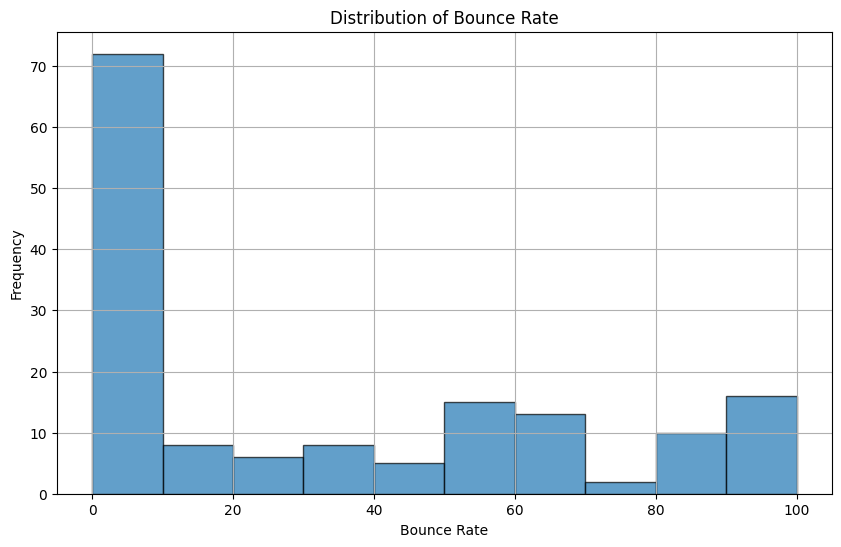

In [45]:
# Plot histogram of bounceRate
plt.figure(figsize=(10, 6))
plt.hist(df['bounceRate'], bins=10, edgecolor='k', alpha=0.7)
plt.title('Distribution of Bounce Rate')
plt.xlabel('Bounce Rate')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

### Optimized Bounce Rate

According to Hubspot.com, the average website bounce rate ranges from 26% to 70%, with an optimal value between 20% and 40%. If the bounce rate reaches 90%, there could be an issue, such as excessive bot traffic or tracking code errors.

**Bounce Rate Ranges:**
- **25% or lower:** Your website may be broken.
- **26-40%:** Good.
- **41-55%:** Average.
- **56-70%:** Higher than average, but acceptable.
- **70% or higher:** Poor performance.

*Source:* [Revou.co](https://revou.co/kosakata/bounce-rate)

In [73]:
df_optimalBounceRate = df[(df['bounceRate'] >= 20) & (df['bounceRate'] <= 40)]
df_optimalBounceRate.sort_values(by='bounceRate', ascending=True)



,sourceMedium,pageTitle,users,bounceRate,pageviews,pageviewsPerSession,avgTimeOnPage
52,facebook / cpc,foto utakatik posisi main alexis sanchez di mu,117.0,20.000000,664.0,14.755556,85.142623
113,facebook / cpc,memememe kocak cristiano ronaldo dan ponsel,90.0,20.000000,296.0,6.577778,38.396694
152,facebook / cpc,gempa keras di jakarta terasa lebih dari 1 menit,180.0,20.000000,215.0,2.388889,233.640000
60,facebook / cpc,foto jelang 100 hari kepemimpinan aniessandi i...,108.0,22.222222,557.0,6.876543,44.690283
74,facebook / cpc,goyangan gempa terasa kuat di perkantoran,395.0,23.420074,440.0,1.635688,99.757962
103,google / cpc,gempa keras guncang jakarta,206.0,27.777778,323.0,1.993827,85.038627
2,facebook / cpc,tak sesuai harapan barang belanja online ini b...,7748.0,30.934520,54657.0,6.949396,21.429338
82,facebook / cpc,penjelasan bmkg soal gempa banten dimutakhirka...,332.0,31.250000,413.0,2.868056,96.466276
41,facebook / cpc,penyebab perut kembung seperti dialami sys ns ...,278.0,33.333333,745.0,27.592593,62.605965
56,facebook / cpc,dinilai lecehkan tni di acara dahsyat artis fe...,512.0,33.333333,637.0,23.592593,5.535473


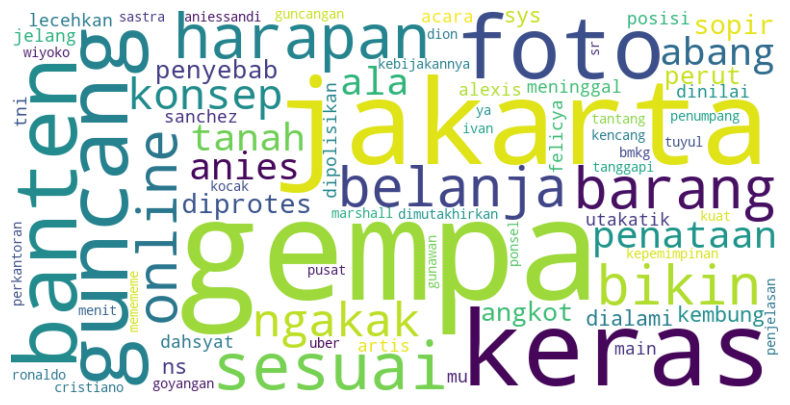

In [74]:
text = " ".join(title for title in df_optimalBounceRate['pageTitle'])

# Tokenize and remove stopwords
filtered_words = [word for word in word_tokenize(text.lower()) if word.isalnum() and word not in stop_words]

# Recombine the filtered words into a single string
filtered_text = " ".join(filtered_words)

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(filtered_text)

# Display the word cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # No axes are shown
plt.show()

### Low Bounce Rate

In [77]:
df_lowBounceRate = df[df['bounceRate'] < 20]
df_lowBounceRate.sort_values(by='bounceRate', ascending=True)

,sourceMedium,pageTitle,users,bounceRate,pageviews,pageviewsPerSession,avgTimeOnPage
75,facebook / cpc,menteri agama keluarga dan puluhan artis antar...,189.0,0.000000,440.0,0.000000,17.346247
112,facebook / cpc,komentar polisi amankan istri yang jual suami...,287.0,0.000000,296.0,32.888889,35.286713
107,facebook / cpc,gaya rambut pasha ungu yang pernah jadi tren m...,99.0,0.000000,305.0,16.944444,28.082645
106,facebook / cpc,foto bukti agnez mo sudah bergaya dengan busan...,27.0,0.000000,305.0,16.944444,21.742160
105,facebook / cpc,ini dia deretan bunker mewah tahan gempa,63.0,0.000000,314.0,0.000000,55.337705
...,...,...,...,...,...,...,...
7,facebook / cpc,kabar duka sys ns meninggal dunia,5180.0,12.714033,24097.0,4.742570,7.382171
50,facebook / cpc,messi berjaket gojek isyana kini jadi korban d...,108.0,16.666667,673.0,12.462963,17.283439
16,facebook / cpc,video truk goyang dan foto jalan retak bukan a...,3070.0,17.070773,3430.0,1.123853,14.565417
47,facebook / cpc,beredar kabar ada gempa susulan 74 sr nanti ma...,584.0,18.556701,709.0,1.461856,51.638489


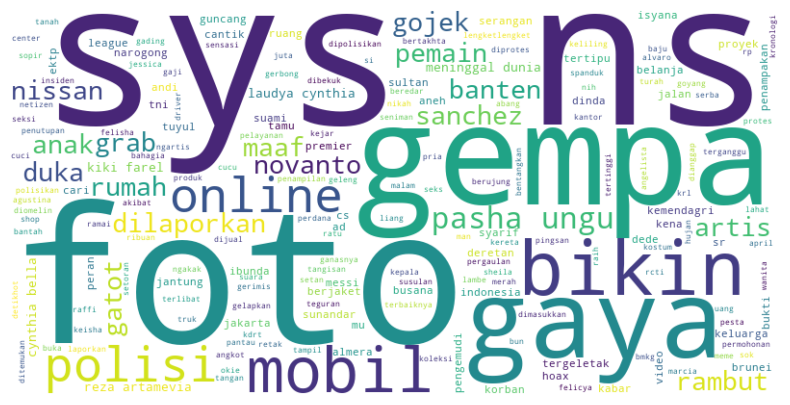

In [78]:
text = " ".join(title for title in df_lowBounceRate['pageTitle'])

# Tokenize and remove stopwords
filtered_words = [word for word in word_tokenize(text.lower()) if word.isalnum() and word not in stop_words]

# Recombine the filtered words into a single string
filtered_text = " ".join(filtered_words)

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(filtered_text)

# Display the word cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # No axes are shown
plt.show()

### Normal Bounce Rate

In [81]:
df_normalBounceRate = df[(df['bounceRate'] >= 20) & (df['bounceRate'] <= 70) ]
df_normalBounceRate.sort_values(by='bounceRate', ascending=True)

,sourceMedium,pageTitle,users,bounceRate,pageviews,pageviewsPerSession,avgTimeOnPage
152,facebook / cpc,gempa keras di jakarta terasa lebih dari 1 menit,180.0,20.000000,215.0,2.388889,233.640000
52,facebook / cpc,foto utakatik posisi main alexis sanchez di mu,117.0,20.000000,664.0,14.755556,85.142623
113,facebook / cpc,memememe kocak cristiano ronaldo dan ponsel,90.0,20.000000,296.0,6.577778,38.396694
60,facebook / cpc,foto jelang 100 hari kepemimpinan aniessandi i...,108.0,22.222222,557.0,6.876543,44.690283
74,facebook / cpc,goyangan gempa terasa kuat di perkantoran,395.0,23.420074,440.0,1.635688,99.757962
103,google / cpc,gempa keras guncang jakarta,206.0,27.777778,323.0,1.993827,85.038627
2,facebook / cpc,tak sesuai harapan barang belanja online ini b...,7748.0,30.934520,54657.0,6.949396,21.429338
82,facebook / cpc,penjelasan bmkg soal gempa banten dimutakhirka...,332.0,31.250000,413.0,2.868056,96.466276
56,facebook / cpc,dinilai lecehkan tni di acara dahsyat artis fe...,512.0,33.333333,637.0,23.592593,5.535473
144,facebook / cpc,dion wiyoko dan marshall sastra tantang ivan g...,27.0,33.333333,224.0,8.296296,6.609137


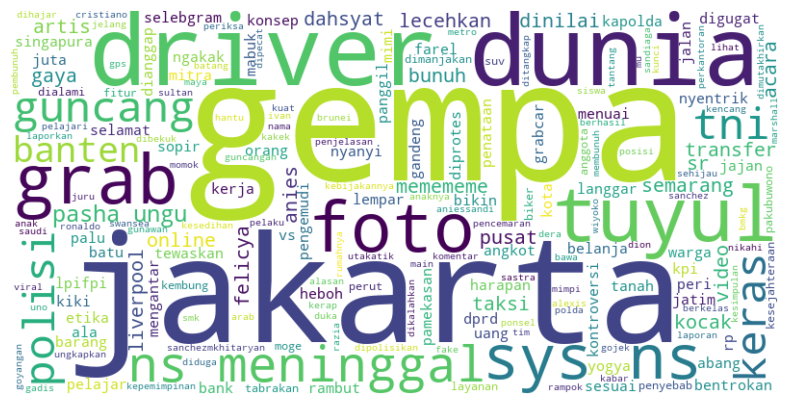

In [82]:
text = " ".join(title for title in df_normalBounceRate['pageTitle'])

# Tokenize and remove stopwords
filtered_words = [word for word in word_tokenize(text.lower()) if word.isalnum() and word not in stop_words]

# Recombine the filtered words into a single string
filtered_text = " ".join(filtered_words)

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(filtered_text)

# Display the word cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # No axes are shown
plt.show()

### High Bounce Rate

In [65]:
df_highBounceRate = df[df['bounceRate'] > 70]
df_highBounceRate.sort_values(by='bounceRate', ascending=True)

,sourceMedium,pageTitle,users,bounceRate,pageviews,pageviewsPerSession,avgTimeOnPage
80,facebook / cpc,anies resmikan pembangunan rumah dp 0 pertama ...,341.0,74.285714,413.0,1.180000,260.444444
151,facebook / cpc,edan ponsel ini punya baterai 13000 mah,198.0,76.923077,215.0,1.837607,101.685393
119,facebook / cpc,kaget makan di restoran bayar rp 17 juta turis...,233.0,80.000000,278.0,6.177778,81.011765
6,facebook / cpc,sultan brunei laporkan kasus pencemaran nama b...,22885.0,81.563047,24941.0,1.091988,128.925825
140,facebook / cpc,tanggapi aksi pukul klub moge harusnya bisa ko...,206.0,81.818182,233.0,2.353535,127.953271
5,facebook / cpc,2 pelajar di yogya lempar batu ke mobil hingga...,28334.0,82.671710,30570.0,1.080632,123.586301
46,facebook / cpc,menhan ryamizard sebut as keberatan ri beli su...,637.0,83.305228,718.0,1.210793,108.938547
90,facebook / cpc,mereka menolak jadi saksi meringankan untuk dr...,296.0,83.333333,377.0,3.490741,236.519418
154,facebook / cpc,kasus salah baca xiaomi terulang kembali,180.0,83.333333,215.0,1.990741,178.449438
15,facebook / cpc,hijabers cantik ini pakai seragam sekolah naik...,3448.0,86.349021,3744.0,1.094417,103.057336


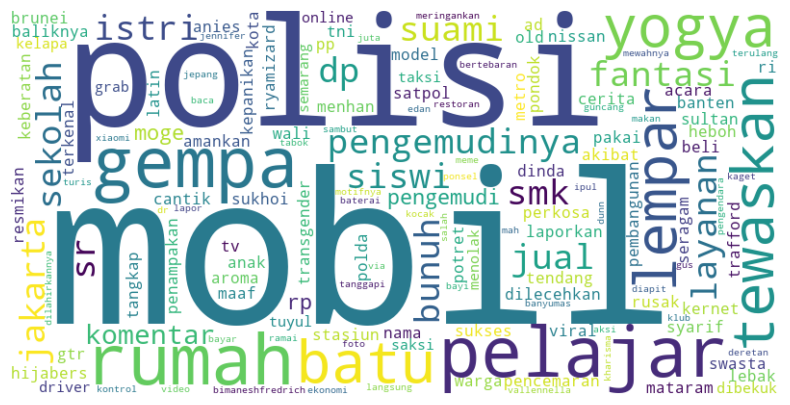

In [66]:
text = " ".join(title for title in df_highBounceRate['pageTitle'])

# Tokenize and remove stopwords
filtered_words = [word for word in word_tokenize(text.lower()) if word.isalnum() and word not in stop_words]

# Recombine the filtered words into a single string
filtered_text = " ".join(filtered_words)

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(filtered_text)

# Display the word cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # No axes are shown
plt.show()